In [2]:
from fastai.tabular.all import *

# Load the csv
df = pd.read_csv('./date_hood_thefts_filled.csv',
                 names=["date", "hood_id", "thefts"])
df.head()


/Users/pika/.pyenv/versions/3.9.13/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,date,hood_id,thefts
0,2015-01-01,0,0
1,2015-01-01,1,0
2,2015-01-01,2,0
3,2015-01-01,3,0
4,2015-01-01,4,0


In [3]:
make_date(df, 'date')
df.head()


,date,hood_id,thefts
0,2015-01-01,0,0
1,2015-01-01,1,0
2,2015-01-01,2,0
3,2015-01-01,3,0
4,2015-01-01,4,0


In [4]:
add_datepart(df, 'date')
df.head()

,hood_id,thefts,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,0,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
1,1,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
2,2,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
3,3,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
4,4,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09


In [27]:
splits = EndSplitter(valid_pct=0.4, valid_last=True)(range_of(df))
tabular_pandas = TabularPandas(
    df, procs=[Categorify, FillMissing, Normalize],
    cat_names=['hood_id', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end',
               'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'],
    cont_names=[],
    y_names="thefts", y_block=CategoryBlock,
    splits=splits)

tabular_pandas.xs.iloc[:5]


/Users/pika/.pyenv/versions/3.9.13/lib/python3.9/site-packages/fastai/tabular/core.py:279: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  to.conts = (to.conts-self.means) / self.stds


,hood_id,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,1,1,1,1,1,4,1,1,2,1,2,1,2
1,2,1,1,1,1,4,1,1,2,1,2,1,2
2,3,1,1,1,1,4,1,1,2,1,2,1,2
3,4,1,1,1,1,4,1,1,2,1,2,1,2
4,5,1,1,1,1,4,1,1,2,1,2,1,2


In [36]:
data_loader = tabular_pandas.dataloaders(bs=2000)
data_loader.show_batch()

/Users/pika/.pyenv/versions/3.9.13/lib/python3.9/site-packages/fastai/tabular/core.py:284: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  to.conts = (to.conts*self.stds ) + self.means


,hood_id,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,thefts
0,45,2015,4,17,22,2,112,False,False,False,False,False,False,0
1,99,2016,5,21,28,5,149,False,False,False,False,False,False,0
2,154,2017,5,18,1,0,121,False,True,False,False,False,False,0
3,153,2015,3,10,4,2,63,False,False,False,False,False,False,0
4,35,2018,7,27,6,4,187,False,False,False,False,False,False,0
5,33,2016,5,21,26,3,147,False,False,False,False,False,False,0
6,127,2015,12,52,26,5,360,False,False,False,False,False,False,1
7,12,2019,1,5,28,0,28,False,False,False,False,False,False,0
8,8,2015,12,52,22,1,356,False,False,False,False,False,False,0
9,87,2017,2,7,15,2,46,False,False,False,False,False,False,0


In [51]:
learn = tabular_learner(data_loader, layers=[
                        200, 200, 200], y_range=(0, 4), loss_func=CrossEntropyLossFlat())


In [52]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,time
0,1.099090,0.815665,00:06
1,0.625019,0.592896,00:05
2,0.545743,0.576617,00:05
3,0.530412,0.575036,00:05


In [53]:
learn.show_results(max_n=50)


,hood_id,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,thefts,thefts_pred
0,15,0,6,22,4,5,155,1,1,1,1,1,1,3,1
1,106,0,1,1,5,3,5,1,1,1,1,1,1,0,0
2,11,0,9,39,30,4,273,2,1,2,1,1,1,0,0
3,78,0,5,22,31,1,151,2,1,1,1,1,1,1,1
4,14,0,4,17,25,6,116,1,1,1,1,1,1,0,0
5,82,5,12,49,6,5,340,1,1,1,1,1,1,0,0
6,93,0,4,17,24,5,115,1,1,1,1,1,1,0,0
7,108,0,11,48,23,1,328,1,1,1,1,1,1,0,0
8,45,0,11,45,4,3,309,1,1,1,1,1,1,0,0
9,76,0,7,28,8,3,190,1,1,1,1,1,1,0,1


In [54]:
# Get the predictions and target values
preds, targs = learn.get_preds()
print(preds)
print(targs)


tensor([[0.7519, 0.1730, 0.0243, 0.0169, 0.0171, 0.0168],
        [0.7351, 0.1936, 0.0218, 0.0164, 0.0163, 0.0168],
        [0.8261, 0.1029, 0.0192, 0.0174, 0.0173, 0.0172],
        ...,
        [0.9026, 0.0206, 0.0197, 0.0193, 0.0190, 0.0188],
        [0.9051, 0.0201, 0.0186, 0.0188, 0.0187, 0.0187],
        [0.9027, 0.0198, 0.0191, 0.0196, 0.0194, 0.0194]])
tensor([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=torch.int8)


In [55]:
# Get the highest value from the predictions tensor
preds = preds.argmax(dim=-1)
print(preds)

tensor([0, 0, 0,  ..., 0, 0, 0])


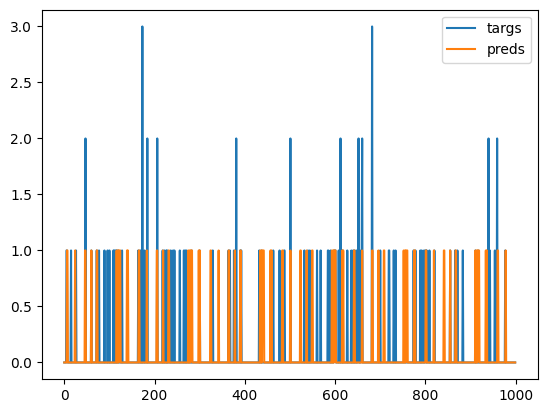

In [57]:
# Plot only the highest predictions vs target in a line plot las 4000 values
plt.plot(targs[-1000:].numpy(), label='targs')
plt.plot(preds[-1000:].numpy(), label='preds')
plt.legend()
plt.show()

In [58]:
# With sckiit-learn calculate the mean squared error and accuracy
from sklearn.metrics import mean_squared_error, accuracy_score

# Round the predictions to the nearest integer
preds = np.round(preds)

print('Mean squared error: ', mean_squared_error(targs, preds))
print('Accuracy: ', accuracy_score(targs, preds))

Mean squared error:  0.2243139372562086
Accuracy:  0.8185186674556078
